# Launch feature extraction node
At a terminal, launch a feature extraction node for the device used to record the bag:
```
roslaunch hri_audition kinect_feat_ext.launch
```

# Train classifiers

In [18]:
from sklearn import mixture
import pandas as pd
import numpy as np
from joblib import dump, load

feat_path = '/home/jd/mmhri_ws/src/hri_audition/data/features/'
model_path = '/home/jd/mmhri_ws/src/hri_audition/data/models/'

def train_gmm(X_train, n_comps=4, cov_type='diag'):
    clf = mixture.GaussianMixture(n_components=n_comps, covariance_type=cov_type)
    clf.fit(X_train)
    return clf

# Ensure data directories exist
if os.path.exists(model_path)==False:
    os.mkdir(model_path)
    
for sound_type in ['voice','scene']:
    full_dir = os.path.join(model_path,sound_type)
    if os.path.exists(full_dir)==False:
        os.mkdir(full_dir)


# # Iterate through each processed feature .csv
# for root, dirs, files in os.walk(feat_path,topdown=True):

#     for file in files:
        
#         filepath = os.path.join(root,file)
        
#         # Get type label of datafile
#         type_dir = os.path.dirname(filepath)
#         type_str = os.path.split(type_dir)[-1]

#         # Get class label of datafile
#         base = os.path.splitext(file)[0]
#         base = base.split('_')[0]
        
#         ext = os.path.splitext(file)[-1]
    
        
#         if (type_str=='voice') & (ext =='.csv'):
#             print(base)
# #             print(ext)
# #             print()
            
#             # Get training data for this voice ID
#             data_df = pd.read_csv(filepath,index_col=0)
#             X = data_df.loc[:,['mfcc_1', 'mfcc_2']].to_numpy()
# #             print(data_df)
#             print(X)
            
            
#             gmm = train_gmm(X)
#             print(gmm.weights_)
#             print(gmm.means_)
#             print(gmm.covariances_)
#             print()
            

        # Visualize / add data to plot
        
        # Save GMM params for this person

# Visualize GMMs

In [16]:
w_christina = np.array([0.17443886, 0.5637767,  0.09273373, 0.16905072])
mean_christina = np.array([[ 74.16277588, -12.76295391],
 [ 61.51153992, -12.4119826 ],
 [ 37.59738915,   1.25041703],
 [ 70.50120822, -35.74247152]])
cov_christina = np.array([[ 51.52320174,  59.18508791],
 [ 23.31902458,  20.11467984],
 [121.42855317,  59.77959243],
 [122.24957425, 115.69487093]])

w_john = np.array([0.15472673, 0.40433006, 0.14948843, 0.29145477])
mean_john = np.array([[ 88.12032578,  -2.92116115],
 [ 66.15019029,  -9.01185485],
 [ 19.18079016,  -6.28421268],
 [ 80.72116822, -28.6676744 ]])
cov_john = np.array([[141.24466107,  70.77484971],
 [ 24.88156488,  16.88749473],
 [484.8393044,  367.53755333],
 [249.17526017, 227.68792389]])

w_justin = np.array([0.27388082, 0.39302163, 0.25570326, 0.07739429])
mean_justin = np.array([[81.07996616, 18.97444698],
 [55.17234842, 27.13206042],
 [77.88680712, -5.34549411],
 [12.46751237, 21.37066161]])
cov_justin = np.array([[242.93032075, 126.85636729],
 [ 19.47643915,  24.71762888],
 [344.40570376, 245.31739949],
 [186.47137509, 298.99646941]])


# Examine feature data

In [75]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

print(matplotlib.__version__)

3.7.2


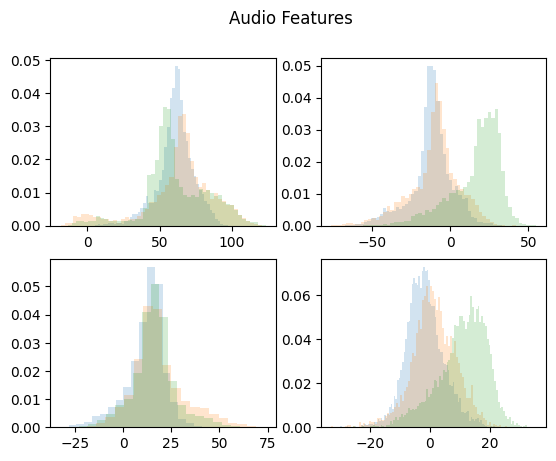

In [101]:
# fig, axs = plt.subplots(7,2)
fig, axs = plt.subplots(2,2)

fig.suptitle('Audio Features')
bins_100=np.linspace(-100,100,100)
bins_25=np.linspace(-25,25,100)
bins_1=np.linspace(0,.1,100)

# data_list = [('scene','lab'),('scene','eme'),('scene','pickleoutside')]
# data_list = [('voice','john'),('voice','christina'), ('scene','lab')]
data_list = [('voice','christina'),('voice','john'),('voice','justin')]
# type = 'voice'
# names = ['john','christina']

for task,name in data_list:
    # load df
    plot_df = pd.read_csv(''.join([feat_path,task,'/',name+'.csv']))

    axs[0,0].hist(plot_df.loc[:,'mfcc_1'].to_numpy(),50,alpha=0.2,label=name,density=True)
    axs[0,1].hist(plot_df.loc[:,'mfcc_2'].to_numpy(),50,alpha=0.2,label=name,density=True)
    axs[1,0].hist(plot_df.loc[:,'mfcc_3'].to_numpy(),20,alpha=0.2,label=name,density=True)
    axs[1,1].hist(plot_df.loc[:,'mfcc_4'].to_numpy(),100,alpha=0.2,label=name,density=True)
    
#     axs[0,0].hist(plot_df.loc[:,'mfcc_1'].to_numpy(),bins_100,alpha=0.25,label=name,density=True)
#     axs[0,1].hist(plot_df.loc[:,'mfcc_2'].to_numpy(),bins_100,alpha=0.25,label=name,density=True)
#     axs[1,0].hist(plot_df.loc[:,'mfcc_3'].to_numpy(),bins_100,alpha=0.25,label=name,density=True)
#     axs[1,1].hist(plot_df.loc[:,'mfcc_4'].to_numpy(),bins_25,alpha=0.25,label=name,density=True)
#     axs[2,0].hist(plot_df.loc[:,'mfcc_5'].to_numpy(),bins_25,alpha=0.25,label=name,density=True)
#     axs[2,1].hist(plot_df.loc[:,'mfcc_6'].to_numpy(),bins_25,alpha=0.25,label=name,density=True)
#     axs[3,0].hist(plot_df.loc[:,'mfcc_7'].to_numpy(),bins_25,alpha=0.25,label=name,density=True)
#     axs[3,1].hist(plot_df.loc[:,'mfcc_8'].to_numpy(),bins_25,alpha=0.25,label=name,density=True)
#     axs[4,0].hist(plot_df.loc[:,'mfcc_9'].to_numpy(),bins_25,alpha=0.25,label=name,density=True)
#     axs[4,1].hist(plot_df.loc[:,'mfcc_10'].to_numpy(),bins_25,alpha=0.25,label=name,density=True)
#     axs[5,0].hist(plot_df.loc[:,'mfcc_11'].to_numpy(),bins_25,alpha=0.25,label=name,density=True)
#     axs[5,1].hist(plot_df.loc[:,'mfcc_12'].to_numpy(),bins_25,alpha=0.25,label=name,density=True)
#     axs[6,0].hist(plot_df.loc[:,'zcr'].to_numpy(),20,alpha=0.25,label=name,density=True)
#     axs[6,1].hist(plot_df.loc[:,'rms'].to_numpy(),100,alpha=0.25,label=name,density=True)
    
plt.show()



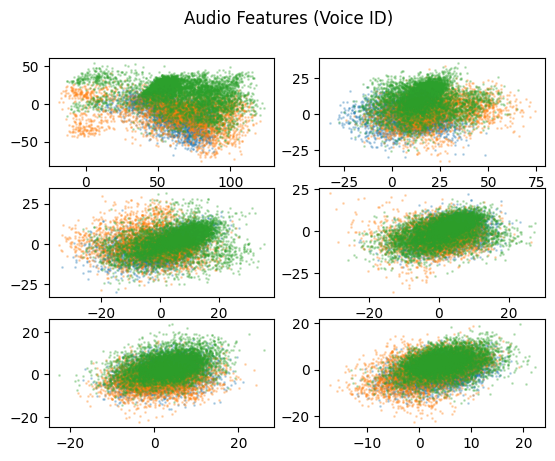

In [93]:
fig, axs = plt.subplots(3,2)
fig.suptitle('Audio Features (Voice ID)')

# data_list = [('scene','lab')]
data_list = [('voice','christina'),('voice','john'),('voice','justin')]

for task,name in data_list:
    # load df
    plot_df = pd.read_csv(''.join([feat_path,task,'/',name+'.csv']))
    
#     axs[0,0].hist2d(plot_df.loc[:,'mfcc_1'].to_numpy(),plot_df.loc[:,'mfcc_2'].to_numpy(),bins=100)
#     axs[0,1].hist2d(plot_df.loc[:,'mfcc_3'].to_numpy(),plot_df.loc[:,'mfcc_4'].to_numpy(),bins=100)
#     axs[1,0].hist2d(plot_df.loc[:,'mfcc_5'].to_numpy(),plot_df.loc[:,'mfcc_6'].to_numpy(),bins=100)
#     axs[1,1].hist2d(plot_df.loc[:,'mfcc_7'].to_numpy(),plot_df.loc[:,'mfcc_8'].to_numpy(),bins=100)
#     axs[2,0].hist2d(plot_df.loc[:,'mfcc_9'].to_numpy(),plot_df.loc[:,'mfcc_10'].to_numpy(),bins=100)
#     axs[2,1].hist2d(plot_df.loc[:,'mfcc_11'].to_numpy(),plot_df.loc[:,'mfcc_12'].to_numpy(),bins=100)
    
    axs[0,0].scatter(plot_df.loc[:,'mfcc_1'].to_numpy(),plot_df.loc[:,'mfcc_2'].to_numpy(),1,alpha=0.25)
    axs[0,1].scatter(plot_df.loc[:,'mfcc_3'].to_numpy(),plot_df.loc[:,'mfcc_4'].to_numpy(),1,alpha=0.25)
    axs[1,0].scatter(plot_df.loc[:,'mfcc_5'].to_numpy(),plot_df.loc[:,'mfcc_6'].to_numpy(),1,alpha=0.25)
    axs[1,1].scatter(plot_df.loc[:,'mfcc_7'].to_numpy(),plot_df.loc[:,'mfcc_8'].to_numpy(),1,alpha=0.25)
    axs[2,0].scatter(plot_df.loc[:,'mfcc_9'].to_numpy(),plot_df.loc[:,'mfcc_10'].to_numpy(),1,alpha=0.25)
    axs[2,1].scatter(plot_df.loc[:,'mfcc_11'].to_numpy(),plot_df.loc[:,'mfcc_12'].to_numpy(),1,alpha=0.25)
    
plt.show()

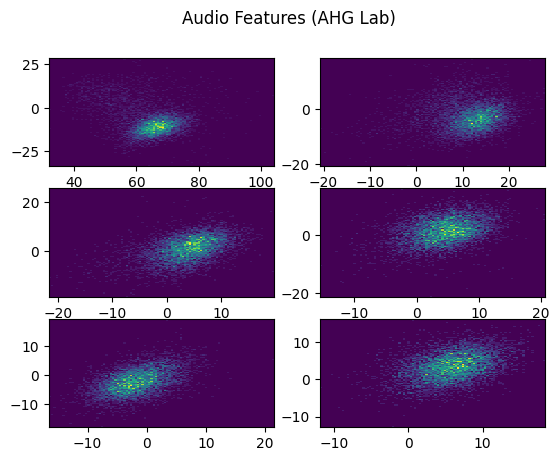

In [90]:
fig, axs = plt.subplots(3,2)
fig.suptitle('Audio Features (AHG Lab)')

data_list = [('scene','lab')]

for task,name in data_list:
    # load df
    plot_df = pd.read_csv(''.join([feat_path,task,'/',name+'.csv']))
    
    axs[0,0].hist2d(plot_df.loc[:,'mfcc_1'].to_numpy(),plot_df.loc[:,'mfcc_2'].to_numpy(),bins=100)
    axs[0,1].hist2d(plot_df.loc[:,'mfcc_3'].to_numpy(),plot_df.loc[:,'mfcc_4'].to_numpy(),bins=100)
    axs[1,0].hist2d(plot_df.loc[:,'mfcc_5'].to_numpy(),plot_df.loc[:,'mfcc_6'].to_numpy(),bins=100)
    axs[1,1].hist2d(plot_df.loc[:,'mfcc_7'].to_numpy(),plot_df.loc[:,'mfcc_8'].to_numpy(),bins=100)
    axs[2,0].hist2d(plot_df.loc[:,'mfcc_9'].to_numpy(),plot_df.loc[:,'mfcc_10'].to_numpy(),bins=100)
    axs[2,1].hist2d(plot_df.loc[:,'mfcc_11'].to_numpy(),plot_df.loc[:,'mfcc_12'].to_numpy(),bins=100)
    
#     axs[0,0].scatter(plot_df.loc[:,'mfcc_1'].to_numpy(),plot_df.loc[:,'mfcc_2'].to_numpy(),1,alpha=0.25)
#     axs[0,1].scatter(plot_df.loc[:,'mfcc_3'].to_numpy(),plot_df.loc[:,'mfcc_4'].to_numpy(),1,alpha=0.25)
#     axs[1,0].scatter(plot_df.loc[:,'mfcc_5'].to_numpy(),plot_df.loc[:,'mfcc_6'].to_numpy(),1,alpha=0.25)
#     axs[1,1].scatter(plot_df.loc[:,'mfcc_7'].to_numpy(),plot_df.loc[:,'mfcc_8'].to_numpy(),1,alpha=0.25)
#     axs[2,0].scatter(plot_df.loc[:,'mfcc_9'].to_numpy(),plot_df.loc[:,'mfcc_10'].to_numpy(),1,alpha=0.25)
#     axs[2,1].scatter(plot_df.loc[:,'mfcc_11'].to_numpy(),plot_df.loc[:,'mfcc_12'].to_numpy(),1,alpha=0.25)
    
plt.show()

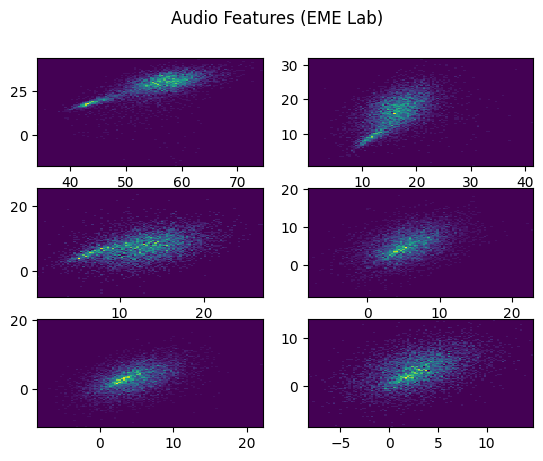

In [53]:
fig, axs = plt.subplots(3,2)
fig.suptitle('Audio Features (EME Lab)')

data_list = [('scene','eme')]
# data_list = [('voice','john'),('voice','christina'), ('scene','lab')]
# data_list = [('voice','john'),('voice','christina')]
# type = 'voice'
# names = ['john','christina']

for task,name in data_list:
    # load df
    plot_df = pd.read_csv(''.join([feat_path,task,'/',name+'.csv']))
    
    axs[0,0].hist2d(plot_df.loc[:,'mfcc_1'].to_numpy(),plot_df.loc[:,'mfcc_2'].to_numpy(),bins=100)
    axs[0,1].hist2d(plot_df.loc[:,'mfcc_3'].to_numpy(),plot_df.loc[:,'mfcc_4'].to_numpy(),bins=100)
    axs[1,0].hist2d(plot_df.loc[:,'mfcc_5'].to_numpy(),plot_df.loc[:,'mfcc_6'].to_numpy(),bins=100)
    axs[1,1].hist2d(plot_df.loc[:,'mfcc_7'].to_numpy(),plot_df.loc[:,'mfcc_8'].to_numpy(),bins=100)
    axs[2,0].hist2d(plot_df.loc[:,'mfcc_9'].to_numpy(),plot_df.loc[:,'mfcc_10'].to_numpy(),bins=100)
    axs[2,1].hist2d(plot_df.loc[:,'mfcc_11'].to_numpy(),plot_df.loc[:,'mfcc_12'].to_numpy(),bins=100)
    
plt.show()

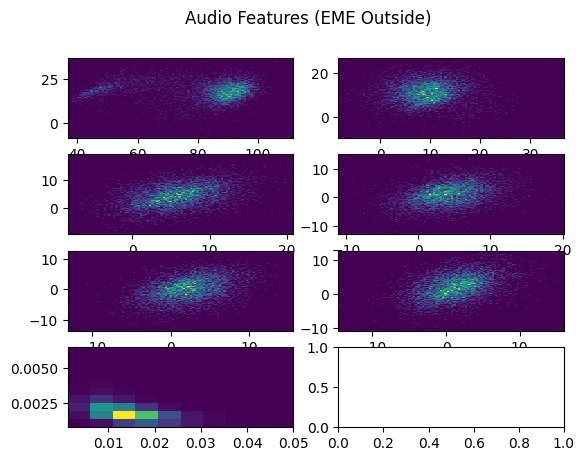

In [69]:
fig, axs = plt.subplots(4,2)
fig.suptitle('Audio Features (EME Outside)')

data_list = [('scene','pickleoutside')]
# data_list = [('voice','john'),('voice','christina'), ('scene','lab')]
# data_list = [('voice','john'),('voice','christina')]
# type = 'voice'
# names = ['john','christina']

for task,name in data_list:
    # load df
    plot_df = pd.read_csv(''.join([feat_path,task,'/',name+'.csv']))
    
    axs[0,0].hist2d(plot_df.loc[:,'mfcc_1'].to_numpy(),plot_df.loc[:,'mfcc_2'].to_numpy(),bins=100)
    axs[0,1].hist2d(plot_df.loc[:,'mfcc_3'].to_numpy(),plot_df.loc[:,'mfcc_4'].to_numpy(),bins=100)
    axs[1,0].hist2d(plot_df.loc[:,'mfcc_5'].to_numpy(),plot_df.loc[:,'mfcc_6'].to_numpy(),bins=100)
    axs[1,1].hist2d(plot_df.loc[:,'mfcc_7'].to_numpy(),plot_df.loc[:,'mfcc_8'].to_numpy(),bins=100)
    axs[2,0].hist2d(plot_df.loc[:,'mfcc_9'].to_numpy(),plot_df.loc[:,'mfcc_10'].to_numpy(),bins=100)
    axs[2,1].hist2d(plot_df.loc[:,'mfcc_11'].to_numpy(),plot_df.loc[:,'mfcc_12'].to_numpy(),bins=100)
    axs[3,0].hist2d(plot_df.loc[:,'zcr'].to_numpy(),plot_df.loc[:,'rms'].to_numpy(),bins=10)
    
plt.show()

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# names = [
#     "Gaussian Process"
# ]

# classifiers = [
#     GaussianProcessClassifier(1.0 * RBF(1.0))
# ]

name = "Gaussian Process"
clf = GaussianProcessClassifier(1.0 * RBF(1.0))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# for name, clf in zip(names, classifiers):

clf = make_pipeline(StandardScaler(), clf)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

print(score)

# From the literature:
- "Robust Text-Independent Speaker Identification Using Gaussian Mixture Speaker Models" Reynolds 1995
20ms segment, every 10ms

filterbank from [23]: 20 filters, 0-4600 Hz "Comparison of Parametric Representations for Monosyllabic Word Recognition in Continuously Spoken Sentences" Davis 1980

one cov matrix per Gauss component, diagonal (not full)